In [98]:
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np
import json
import warnings 
from calculations import InfraCalculate as inf 
import datetime
from datetime import datetime, timedelta
import threading
import time
import schedule
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import importlib
from modelScript.uniVariate import NathanClaire_UnivariateTimeSeries as lib
import modelScript.uniVariate
importlib.reload(modelScript.uniVariate)

def liveDataHandler(db_path, table_name):
# Connect to the SQLite database.
    conn = sqlite3.connect(db_path)
    query = f"""
    SELECT * FROM '{table_name}' 
    """
    dataset = pd.read_sql_query(query, conn)
    dataset.to_parquet('modellingData.parquet', engine='fastparquet', index=False)
    conn.close()
    dataset = pd.read_parquet('modellingData.parquet', engine='fastparquet')
    return dataset

data = liveDataHandler('EdgeDB 2', 'Infra_Utilization')
data['HostAndIP'] = data['Hostname'] + data['IPAddress'].str.replace('"', '')

if not data.empty:
    emptyData = False 
else:
    empytyDdata = True

In [99]:
df = data[['LogTimestamp', 'HostAndIP', 'CPUUsage', 'MemoryUsage', 'TotalMemory', 'DiskUsage', 'TotalFreeDiskGB', 'TotalDiskSpaceGB', 'NetworkTrafficSent', 'NetworkTrafficReceived']]
df['LogTimestamp'] = pd.to_datetime(df['LogTimestamp'])

In [109]:
# data.sample(60)
data.NetworkTrafficSent.max()

95063079.04980467

In [100]:
# ds = df[df.HostAndIP == 'Edge-server[10.3.0.5]']
ds = df.copy()
ts = lib(ds, 'CPUUsage', 'LogTimestamp', 'EdgeServer-New[10.3.0.5]', '10min')

ts.data

TotalMemory  TotalFreeDiskGB  CPUUsage  MemoryUsage  \
LogTimestamp                                                               
2024-10-22 14:30:00        15.95            29.53  5.250000    37.200000   
2024-10-22 14:40:00        15.95            29.53  2.244444    37.333333   
2024-10-22 14:50:00        15.95            29.53  6.712500    37.862500   
2024-10-22 15:00:00        15.95            29.53  2.960000    37.980000   
2024-10-22 15:10:00        15.95            29.53  3.100000    37.555556   
...                          ...              ...       ...          ...   
2024-12-03 13:50:00        15.95            92.32  1.233333    51.288889   
2024-12-03 14:00:00        15.95            92.32  1.250000    50.950000   
2024-12-03 14:10:00        15.95            29.52  0.750000    50.900000   
2024-12-03 14:20:00        15.95            92.31  0.560000    50.970000   
2024-12-03 14:30:00        15.95            29.52  0.690909    51.218182   

                     DiskUsage  NetworkTrafficSent  NetworkTrafficReceived  
LogTimestamp                                                                
2024-10-22 14:30:00  16.200000        1.257913e+08            7.096696e+07  
2024-10-22 14:40:00  16.166667        5.660954e+08            3.193846e+08  
2024-10-22 14:50:00  16.112500        5.036363e+08            2.839782e+08  
2024-10-22 15:00:00  16.100000        6.300361e+08            3.550780e+08  
2024-10-22 15:10:00  16.100000        5.671550e+08            3.196620e+08  
...                        ...                 ...                     ...  
2024-12-03 13:50:00  17.350000        3.420860e+09            2.237928e+09  
2024-12-03 14:00:00  17.350000        3.801031e+09            2.486663e+09  
2024-12-03 14:10:00  17.350000        3.801111e+09            2.486743e+09  
2024-12-03 14:20:00  17.350000        3.801190e+09            2.486822e+09  
2024-12-03 14:30:00  18.227273        2.091127e+09            1.367794e+09  

[6049 rows x 7 columns]

In [88]:
ts.visual()

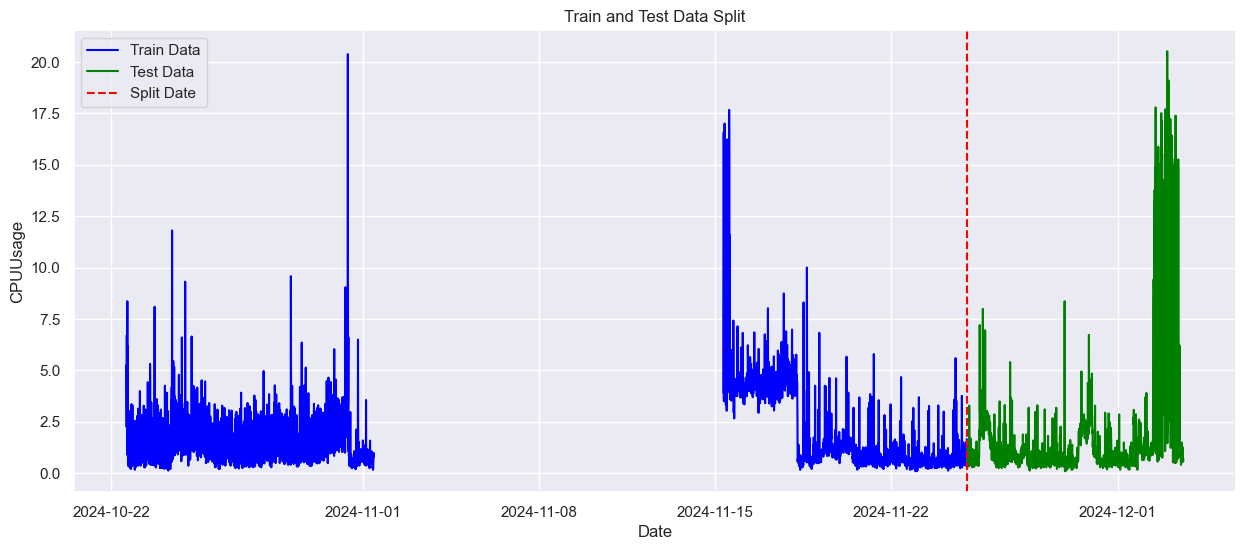

In [101]:
ts.generateModelData(show_split=True, split_date='2024-11-25')

12:52:22 - cmdstanpy - INFO - Chain [1] start processing
12:52:23 - cmdstanpy - INFO - Chain [1] done processing


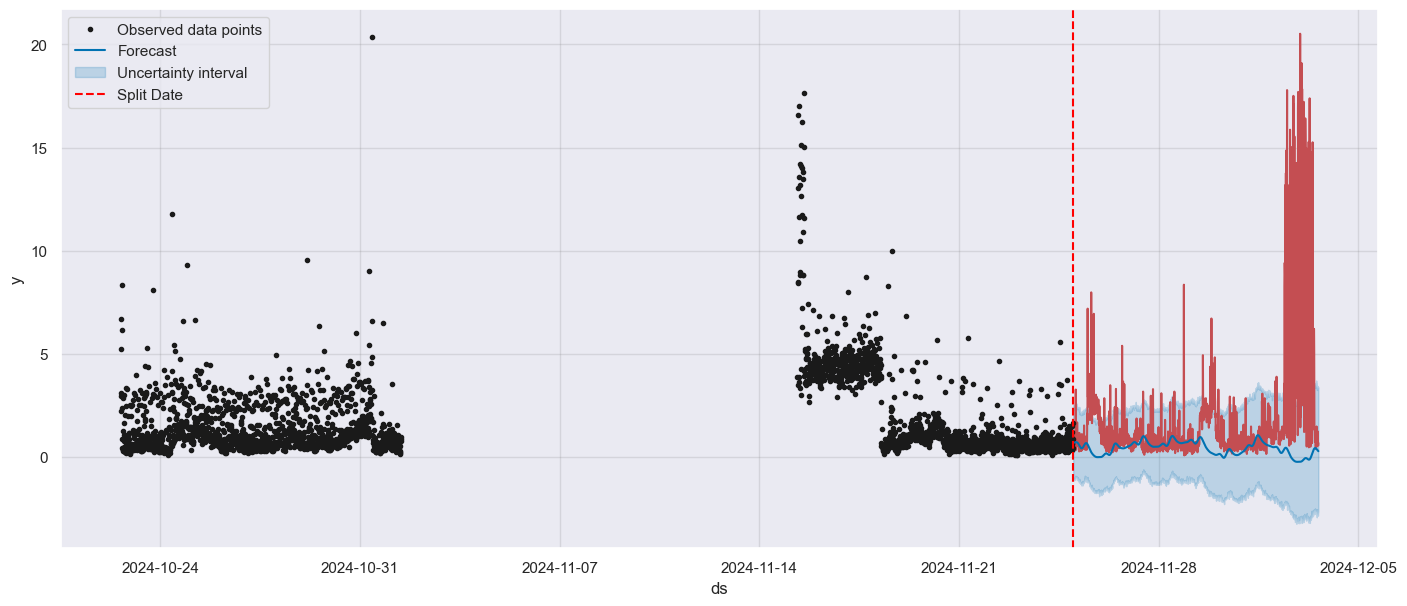

Coef Of Determination: -139.75949111276032
Correlation Coefficient: -0.47047346224075454



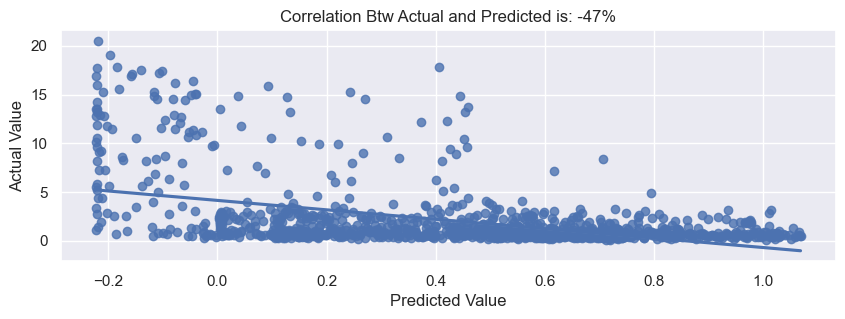

In [102]:
ts.modelling(plotPerformance=True, similarityScore=True, returnFullData=True, homoscedasticity=True)

In [71]:
import importlib
from modelScript.uniVariate import NathanClaire_UnivariateTimeSeries as lib
import modelScript.uniVariate
importlib.reload(modelScript.uniVariate)

<module 'modelScript.uniVariate' from '/Users/Ehiz/Documents/Nathan Claire/Edge/Dashboards/Infrastructure/modelScript/uniVariate.py'>

12:52:28 - cmdstanpy - INFO - Chain [1] start processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing


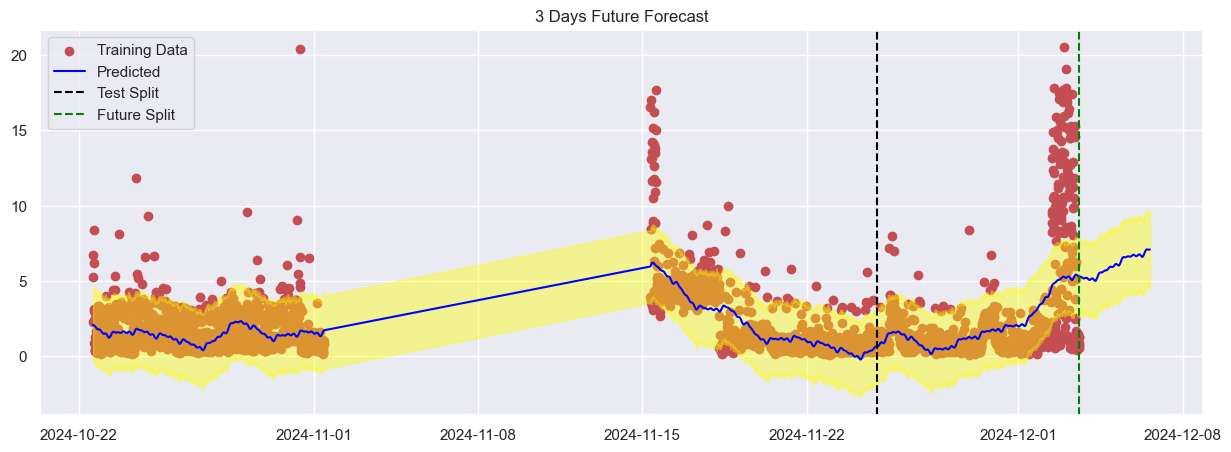

ds  yhat
4049 2024-12-03 14:40:00  5.29
4050 2024-12-03 14:50:00  5.29
4051 2024-12-03 15:00:00  5.28
4052 2024-12-03 15:10:00  5.28
4053 2024-12-03 15:20:00  5.28
...                  ...   ...
4476 2024-12-06 13:50:00  7.07
4477 2024-12-06 14:00:00  7.07
4478 2024-12-06 14:10:00  7.07
4479 2024-12-06 14:20:00  7.08
4480 2024-12-06 14:30:00  7.08

[432 rows x 2 columns]

In [103]:
ts.futureForecast(timeDiff='10minute', NumOfDays=3, getForecast=True, plotForecast=True)

In [58]:
import inspect
methods = inspect.getmembers(ts, predicate=inspect.ismethod)
method_names = [name for name, _ in methods]
print(method_names)

['__init__', 'cleanData', 'futureForecast', 'generateModelData', 'modelling', 'visual']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Define the weights for each feature (should sum to 1)
weights = {
    'CPUUsage': 0.4,
    'MemoryUsage': 0.25,
    'TotalMemory': 0.05,
    'DiskUsage': 0.15,
    'TotalFreeDiskGB': 0.1,
    'NetworkTrafficSent': 0.025,
    'NetworkTrafficReceived': 0.025
}

# Select the relevant columns for normalization
features = ['CPUUsage', 'MemoryUsage', 'TotalMemory', 'DiskUsage', 'TotalFreeDiskGB', 'NetworkTrafficSent', 'NetworkTrafficReceived']

# Normalize the feature values to a 0-1 range
for i in dx.drop('LogTimestamp', axis = 1).columns:
    scaler = MinMaxScaler()
    dx[i] = scaler.fit_transform(dx[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))

# Calculate the composite metric
dx['CompositeMetric'] = (
    dx['CPUUsage'] * weights['CPUUsage'] +
    dx['MemoryUsage'] * weights['MemoryUsage'] +
    dx['TotalMemory'] * weights['TotalMemory'] +
    dx['DiskUsage'] * weights['DiskUsage'] +
    dx['TotalFreeDiskGB'] * weights['TotalFreeDiskGB'] +
    dx['NetworkTrafficSent'] * weights['NetworkTrafficSent'] +
    dx['NetworkTrafficReceived'] * weights['NetworkTrafficReceived']
).round(2)

dx

In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
modellingData = pd.read_parquet('infraParq.parquet', engine = 'fastparquet')
modellingData['hostAndIP'] = modellingData['Hostname'] + modellingData['IPAddress'].str.replace('"', '')

In [10]:
resp = "[PP]modellingData[(modellingData['LogTimestamp'] ≥ '2024-11-01') & (modellingData['LogTimestamp'] ≤ '2024-11-30')]"
i = resp.split(']', 1)[1]
i

"modellingData[(modellingData['LogTimestamp'] ≥ '2024-11-01') & (modellingData['LogTimestamp'] ≤ '2024-11-30')]"

In [16]:
# import sqlite3
# import pandas as pd
conn = sqlite3.connect('EdgeDb 2')
query = f"""
SELECT * FROM '{'Infra_Utilization'}' ;
"""
dataset = pd.read_sql_query(query, conn)
dataset.LogTimestamp.min()

'2024-10-03 16:35:06'